In [3]:

# When exploring data, the outliers are the extreme values within the dataset. That means the outlier 
# data points vary greatly from the expected values—either being much larger or significantly smaller. 
# For data that follows a normal distribution, the values that fall more than three standard deviations 
# from the mean are typically considered outliers. 


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


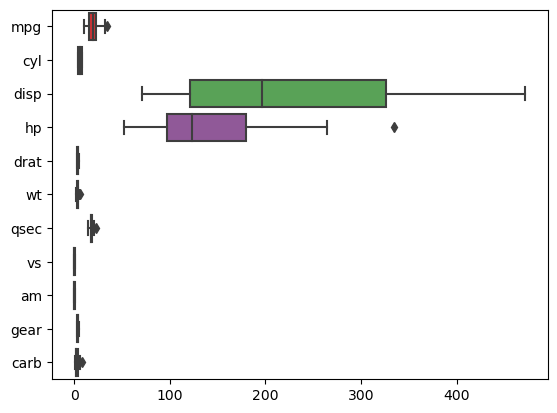

In [31]:

df_new = df[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
ax = sns.boxplot(data=df_new, orient="h", palette="Set1")


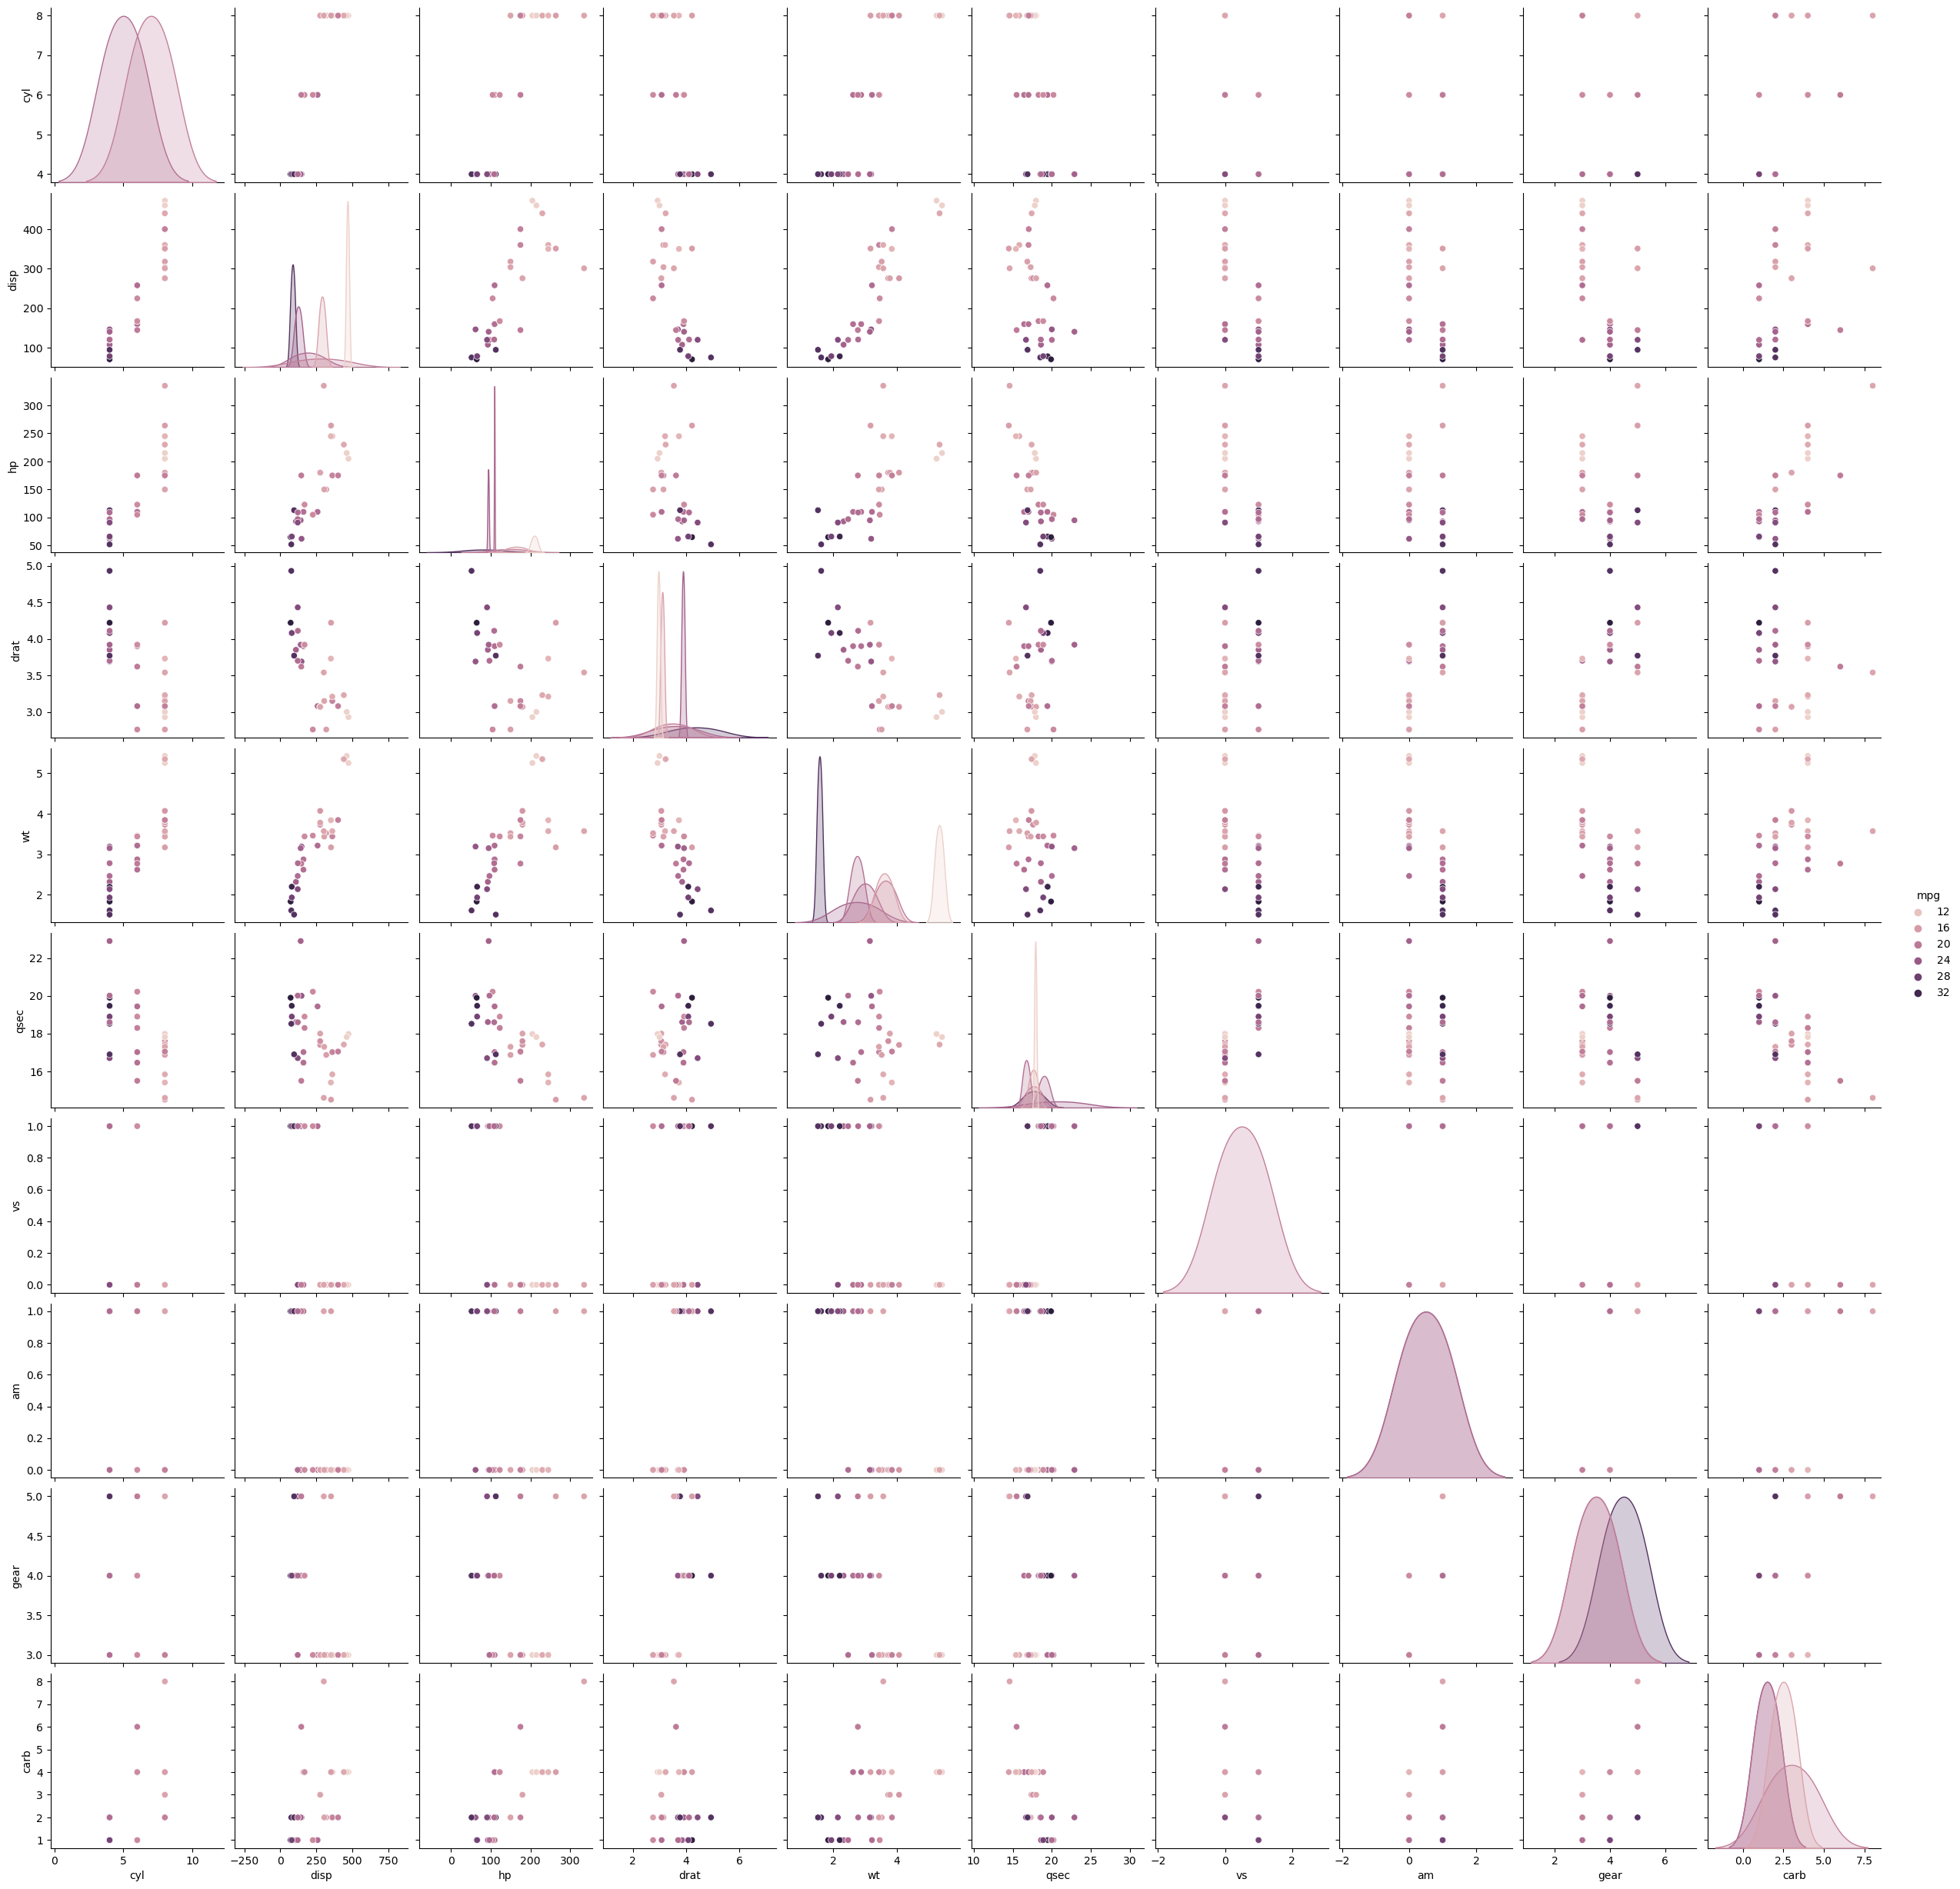

In [38]:

sns.pairplot(data=df,hue='mpg')


In [25]:

import numpy as np
print(np.where(df['wt']>03.5))


(array([ 6, 11, 12, 13, 14, 15, 16, 21, 23, 24, 30], dtype=int64),)


In [14]:

# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df['hp']))
print(z.sort_values(ascending=False))


Maserati Bora          2.790515
Ford Pantera L         1.738399
Duster 360             1.456847
Camaro Z28             1.456847
Honda Civic            1.403130
Merc 240D              1.254944
Chrysler Imperial      1.234569
Toyota Corolla         1.210489
Fiat 128               1.195670
Fiat X1-9              1.195670
Lincoln Continental    1.012291
Cadillac Fleetwood     0.864106
Porsche 914-2          0.825207
Datsun 710             0.795570
Merc 230               0.765933
Toyota Corona          0.736296
Valiant                0.617748
Volvo 142E             0.558473
Mazda RX4 Wag          0.543655
Hornet 4 Drive         0.543655
Mazda RX4              0.543655
Lotus Europa           0.499199
Merc 450SLC            0.493642
Merc 450SL             0.493642
Merc 450SE             0.493642
Pontiac Firebird       0.419550
Hornet Sportabout      0.419550
Ferrari Dino           0.419550
Merc 280C              0.351014
Merc 280               0.351014
Dodge Challenger       0.049086
AMC Jave

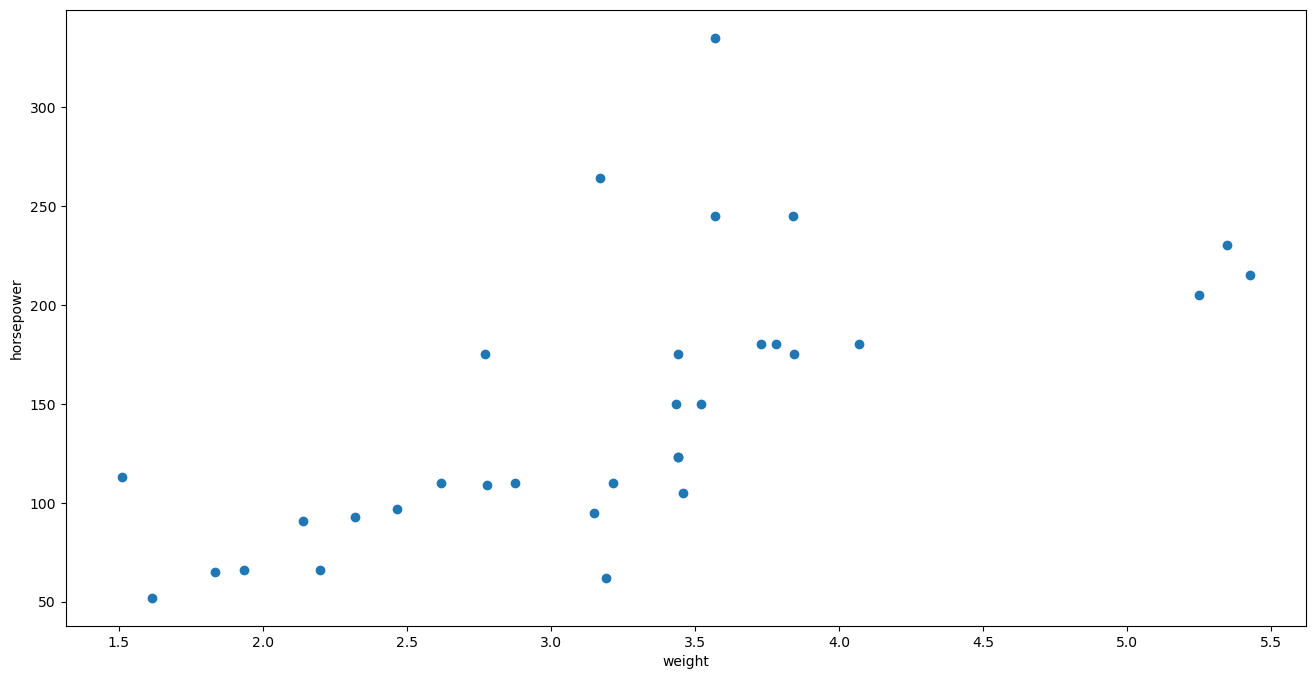

In [26]:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['wt'], df['hp'])
ax.set_xlabel('weight')
ax.set_ylabel('horsepower')
plt.show()


In [27]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


mpg       7.37500
cyl       4.00000
disp    205.17500
hp       83.50000
drat      0.84000
wt        1.02875
qsec      2.00750
vs        1.00000
am        1.00000
gear      1.00000
carb      2.00000
dtype: float64


In [37]:

# let's copy the outliers to an 'upper' dataframe and preserve the non-outliers to a 'lower' dataframe.

mean = df['hp'].mean()
std = df['hp'].std()

print(df.shape)
df_upper = df[((df['hp'] > mean+std))].copy()

print(df_upper.shape)
print(df_upper)

df_lower = df[((df['hp'] < mean+std))].copy()
print(df_lower.shape)
print(df_lower)


(32, 11)
(5, 11)
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Duster 360         14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0     3   
Camaro Z28         13.3    8  350.0  245  3.73  3.840  15.41   0   0     3   
Ford Pantera L     15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Maserati Bora      15.0    8  301.0  335  3.54  3.570  14.60   0   1     5   

                   carb  
Duster 360            4  
Chrysler Imperial     4  
Camaro Z28            4  
Ford Pantera L        4  
Maserati Bora         8  
(27, 11)
                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    

In [ ]:

# There are different methods for identifying outliers, including graphical methods (e.g., box plots) and statistical 
# methods (e.g., the Z-score method, the modified Z-score method, and the interquartile range method). The choice of 
# method depends on the nature of the data and the goals of the analysis. In general, outliers should be carefully 
# investigated and, if necessary, corrected or removed before conducting further statistical analyses.
